# Open-EO compositing

In [1]:
import openeo
import logging

In [2]:
logging.basicConfig(level=logging.DEBUG)

Setup a session, this represents your connection to the backend.

In [3]:
session = openeo.session("nobody", "http://192.168.205.137:8080")

Create a composite based on a Sentinel 2 FAPAR layer that is available in the backend. 
This simply describes the parameters to create the composite, no actual processing occurs yet.

In [4]:
s2_fapar = session.imagecollection("S2_FAPAR")

composite = s2_fapar\
.date_range_filter("2017-06-01","2017-08-10")\
.bbox_filter(left=4.3,right=5.7,top=50.28,bottom=50.55,srs="EPSG:4326")\
.max_time()

Now our composite is ready to download

In [5]:
composite.download("./openeo-composite.geotiff","geotiff")

DEBUG:urllib3.connectionpool:Starting new HTTP connection (1): 192.168.205.137
DEBUG:urllib3.connectionpool:http://192.168.205.137:8080 "POST /openeo/download HTTP/1.1" 200 45625733


##Showing the result
Using rasterio, we can 

In [6]:
import rasterio


DEBUG:rasterio._drivers:Env <rasterio._drivers.GDALEnv object at 0x7f19c5ff6e28> has been started
DEBUG:rasterio._drivers:Set option CHECK_WITH_INVERT_PROJ=True in env <rasterio._drivers.GDALEnv object at 0x7f19c5ff6e28>
DEBUG:rasterio.env:New GDAL environment <rasterio._drivers.GDALEnv object at 0x7f19c5ff6e28> created
DEBUG:rasterio.env:Environment <rasterio._drivers.GDALEnv object at 0x7f19c5ff6e28> exists


In [7]:
composite_local = rasterio.open("./openeo-composite.geotiff")

DEBUG:rasterio._base:Got coordinate system
DEBUG:rasterio._base:Nodata success: 1, Nodata value: 255.000000
DEBUG:rasterio._base:Dataset <open RasterReader name='./openeo-composite.geotiff' mode='r'> is started.


DEBUG:rasterio._io:all_valid: False
DEBUG:rasterio._io:mask_flags: [8]


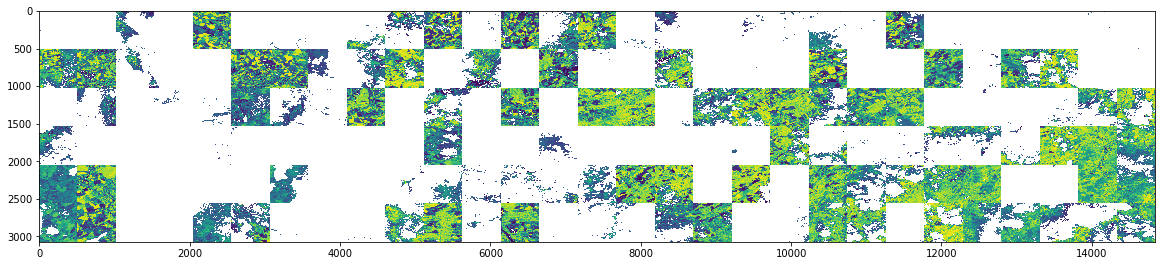

In [13]:
from rasterio.plot import show
from matplotlib import pyplot
fig, ax = pyplot.subplots(1, figsize=(20, 6))
show(composite_local,ax=ax)
pyplot.show()